In [3]:
from pycaret.regression import *
from pycaret.classification import *
from pycaret.time_series import *

from matplotlib import pyplot as plt
import pandas as pd
from datetime import datetime as dt

In [4]:
df = pd.DataFrame()
df_new = pd.DataFrame()
for year in [2019,2020,2021,2022]:
    for semester in [1,2]:
        df = df.append(pd.read_csv(f'Data/ca-{year}-0{semester}.csv', delimiter=';', decimal = ',', encoding = 'utf8'))



In [5]:
display(df.head())

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,GASOLINA,03/01/2019,4.199,3.5766,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,ETANOL,03/01/2019,2.899,2.3513,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,DIESEL S10,03/01/2019,3.349,2.8841,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,GNV,03/01/2019,2.439,NaN,R$ / m³,PETROBRAS DISTRIBUIDORA S.A.
4,S,RS,CANOAS,METROPOLITANO COMERCIO DE COMBUSTIVEIS LTDA,88.587.589/0001-17,AVENIDA GUILHERME SCHELL,6340,NaN,CENTRO,92310-000,GASOLINA,02/01/2019,4.399,3.8550,R$ / litro,BRANCA


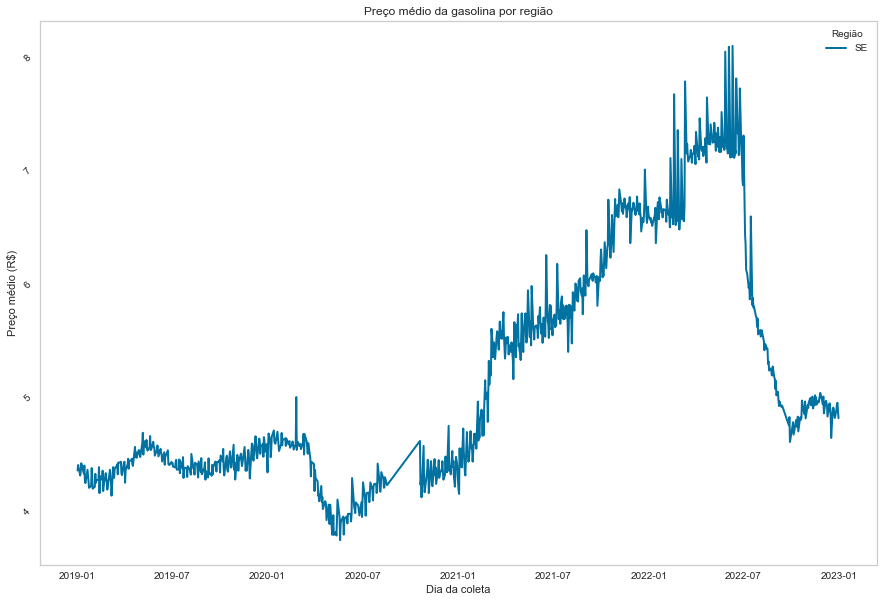

In [6]:
plt.figure(figsize = (15,10))
for regiao in ['SE']:
  # Selecionar o tipo de combustível
  for tipo in ['GASOLINA']:  #  'ETANOL', 'GNV', 'DIESEL', 'DIESEL S10' 

    # Cria um dataframe temporário com os dados do tipo de combustível selecionado
    df_temp = df.loc[(df['Produto'] == tipo)&(df['Regiao - Sigla'] == regiao)]

    date_format = '%d/%m/%Y'

    date_time = []
    for date in df_temp['Data da Coleta']:
      date_time.append(dt.strptime(date, date_format))

    # Calcula o valor médio do combustível por dia
    meanval = []
    for date in df_temp['Data da Coleta'].unique():
      meanval.append(df_temp.loc[df_temp['Data da Coleta'] == date]['Valor de Venda'].mean())
    
    # Cria um vetor com os dias únicos
    date_time_unique = []
    for date in df_temp['Data da Coleta'].unique():
      date_time_unique.append(dt.strptime(date, date_format))
    # cria um dataframe contendo os dia únicos e os valores médios, colocando os dias em ordem crescente
    df_new = pd.DataFrame({'Data da Coleta': date_time_unique, 'Valor de Venda': meanval})
    df_new = df_new.sort_values(by=['Data da Coleta'])
    # coloca a data como index
    df_new = df_new.set_index('Data da Coleta')

    
    plt.plot(df_new, lw = 2, label = regiao)
plt.legend(title = 'Região')
plt.grid()
plt.title('Preço médio da gasolina por região')
plt.xlabel('Dia da coleta')
plt.ylabel('Preço médio (R$)')
plt.yticks(rotation = 45)
plt.show()


In [7]:
df_regression = df_new.reset_index()
display(df_new)

,Valor de Venda
Data da Coleta,
2019-01-02,4.351053
2019-01-03,4.398718
2019-01-07,4.306701
2019-01-08,4.337754
2019-01-09,4.414735
...,...
2022-12-26,4.883914
2022-12-27,4.936699
2022-12-28,4.947867


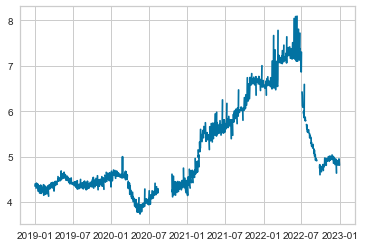

In [8]:
df_reg = df_new.asfreq(freq = '1d')

plt.plot(df_reg)


In [9]:
df_reg = (df_reg.interpolate(method = 'time', order = 1))

In [10]:
s = setup(df_reg, fh = 31, fold = 10,  target = 'Valor de Venda')

,Description,Value
0,session_id,3058
1,Target,Valor de Venda
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(1459, 1)"
5,Transformed data shape,"(1459, 1)"
6,Transformed train set shape,"(1428, 1)"
7,Transformed test set shape,"(31, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [11]:
best_model = compare_models(exclude = 'auto-arima')

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
snaive,Seasonal Naive Forecaster,3.1330,2.3433,0.2746,0.3208,0.0461,0.0438,-2.2533,0.0750
arima,ARIMA,3.1803,2.3517,0.2787,0.3223,0.0470,0.0445,-2.4889,0.2690
stlf,STLF,3.2140,2.3383,0.2807,0.3196,0.0470,0.0446,-2.1524,0.1240
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,3.2552,2.4484,0.2857,0.3360,0.0480,0.0457,-2.6265,0.5140
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,3.3291,2.4622,0.2923,0.3384,0.0492,0.0467,-2.8347,0.6160
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,3.3328,2.4642,0.2927,0.3386,0.0493,0.0468,-2.8540,0.5890
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,3.3341,2.4648,0.2928,0.3387,0.0493,0.0468,-2.8579,0.9120
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,3.3591,2.5118,0.2950,0.3449,0.0496,0.0468,-2.5972,0.7730
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,3.3613,2.5425,0.2945,0.3480,0.0493,0.0467,-2.4508,1.1030
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,3.3734,2.5138,0.2972,0.3466,0.0503,0.0475,-3.1554,1.3100


In [12]:
snaive_model = create_model('snaive')


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2022-01-23,1.4802,1.7675,0.1202,0.2167,0.0171,0.0175,0.1894
1,2022-02-23,3.6606,3.0002,0.2986,0.3707,0.0420,0.0425,-0.3010
2,2022-03-26,1.2588,1.1908,0.1078,0.1595,0.0146,0.0149,-0.5519
3,2022-04-26,1.3295,1.0700,0.1145,0.1439,0.0155,0.0155,0.1744
4,2022-05-27,1.4264,1.2060,0.1227,0.1620,0.0163,0.0164,0.6859
5,2022-06-27,13.8750,9.5273,1.1960,1.2784,0.2000,0.1792,-6.4330
6,2022-07-28,3.2630,2.1870,0.3080,0.3394,0.0577,0.0557,-4.8825
7,2022-08-28,3.2880,2.1784,0.3119,0.3368,0.0642,0.0618,-6.1061
8,2022-09-28,0.8874,0.6863,0.0844,0.1056,0.0176,0.0177,-0.4961
9,2022-10-29,0.8611,0.6196,0.0816,0.0948,0.0164,0.0166,-4.8122


In [18]:
plot_model(snaive_model, plot = 'train_test_split')

In [20]:
plot_model(snaive_model, plot = 'forecast')

In [21]:
final = finalize_model(snaive_model)

In [24]:
plot_model(final, plot = 'forecast', data_kwargs={'fh': 90})

In [25]:
arimaModel = create_model('arima')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2022-01-23,1.8743,1.8051,0.1522,0.2213,0.0221,0.0223,0.1545
1,2022-02-23,3.5844,2.9078,0.2923,0.3593,0.0412,0.0414,-0.2221
2,2022-03-26,0.9667,0.9731,0.0828,0.1303,0.0112,0.0114,-0.0363
3,2022-04-26,1.5419,1.1709,0.1328,0.1575,0.0181,0.0179,0.0113
4,2022-05-27,1.3293,1.1205,0.1143,0.1505,0.0155,0.0153,0.7288
5,2022-06-27,14.0164,9.6670,1.2082,1.2971,0.2022,0.1808,-6.6525
6,2022-07-28,3.1348,2.1317,0.2959,0.3308,0.0555,0.0536,-4.5889
7,2022-08-28,3.2865,2.1925,0.3118,0.3390,0.0642,0.0618,-6.1984
8,2022-09-28,1.0079,0.8245,0.0959,0.1269,0.0198,0.0201,-1.1594
9,2022-10-29,1.0605,0.7235,0.1005,0.1107,0.0202,0.0205,-6.9264


In [27]:
plot_model(arimaModel, plot = 'forecast', data_kwargs={'fh':31})